In [1]:
!pip uninstall scipy -y

In [5]:
!pip install --upgrade pip

  Using cached pip-22.1.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [6]:
!pip install scipy==1.8

In [7]:
!pip install networkx
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:01:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.9/930.9 kB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:01:01


In [9]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 kB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [4]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

In [5]:
#read graphs from dataset
G=nx.read_edgelist('data/facebook_combined.txt',nodetype=int)
#generate a random graph
V=nx.barabasi_albert_graph(4039, 22, seed=None)

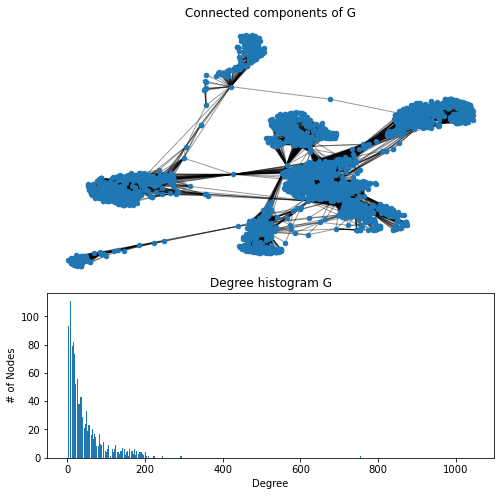

In [9]:
def plot_graph(G,name):    
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)
    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of "+name)
    ax0.set_axis_off()
    
    ax2 = fig.add_subplot(axgrid[3:, :])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram "+name)
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")
    
plot_graph(G,"G")

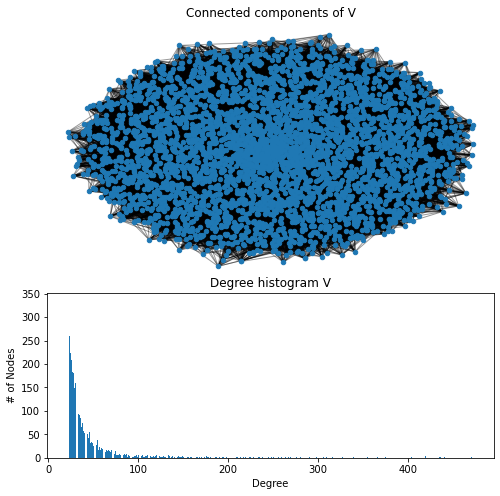

In [10]:
plot_graph(V,"V")

In [1]:
from collections import Counter
def plotV2(title='',xlabel='',ylabel='',dictionary=None,width_par=4.0,no_keys=False):
    plt.title(title)
    #od = collections.OrderedDict(sorted(d.items()))
    if no_keys:
        plt.bar(dictionary.keys(),dictionary.values(),width=width_par)
    else:
        plt.bar(range(len(dictionary.keys())),dictionary.values(),width=width_par)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def metrics_calculation(Graph,name):
    print("-"*20)
    print("Graph "+name+"\n")
    nodelen=len(Graph.nodes())
    print("Number of vertexes")
    print(len(Graph.nodes()))
    print("-"*5)
    print("Number of Edges")
    print(len(Graph.edges()))
    print("-"*5)
    plotV2(title="Node_Degrees",dictionary=dict(Graph.degree(Graph.nodes())),
           ylabel="Degree",xlabel="Nodes",width_par=4.0)
    #od = collections.OrderedDict(sorted(d.items()))
    #plt.bar([k for k,v in sorted(G.degree(G.nodes()),key=lambda item: item[1])]
    #,[v for k,v in sorted(G.degree(G.nodes()),key=lambda item: item[1])],width=4.0,align='center') # A bar chart
    #plt.ylabel('Degree')
    #plt.show()
    #plt.title("All shortest path lengths")
    #print(dict(nx.all_pairs_shortest_path_length(G)))

    def sh_pa():
        paths={}
        for k,paths_vertex in nx.all_pairs_shortest_path_length(Graph):
            for v,path in paths_vertex.items():
                paths[str(k)+' '+str(v)]=path
        returned=dict(Counter(paths.values()))
        del returned[0]
        print(returned)
        return returned

    plotV2(title="All shortest path lengths",xlabel="Distances",ylabel="Node_pairs_Ammount",
           dictionary=sh_pa(),width_par=0.8)
    #plt.bar([k for k in sh_pa().keys()],[v for v in sh_pa().values()]) # A bar chart
    #plt.xlabel('Distances')
    #plt.ylabel('Nodes_Ammount')
    #plt.show()
    ecc=(nx.eccentricity(Graph))
    ecce=dict(sorted(ecc.items(), key=lambda item: item[1]))
    plotV2(title="Eccentricity",xlabel="Nodes",ylabel="Eccentricity",
           dictionary=ecce)
    print(dict(Counter(ecce.values())))
    print("Radius")#max distance
    print(nx.radius(Graph))
    print("-"*5)
    print("Diameter")#min distance
    print(nx.diameter(Graph))
    print("-"*5)
    closeness=(nx.closeness_centrality(Graph))
    x=dict(sorted(closeness.items(), key=lambda item: item[1]))
    plotV2(title="Closseness_Centrality",xlabel="Nodes",ylabel="Centrality",
           dictionary=x)
    print(x)
    betweenness=(nx.betweenness_centrality(Graph))
    bet=dict(sorted(betweenness.items(), key=lambda item: item[1]))
    plotV2(title="Betweness_Centrality",xlabel="Nodes",ylabel="Centrality",
           dictionary=bet)
    print(bet)
    plotV2(title="Degree_Centrality",xlabel="Nodes",ylabel="Centrality",
           dictionary=nx.degree_centrality(Graph))
    print('---------/n')
    eigen=nx.eigenvector_centrality(Graph)
    eigen_=dict(Counter(eigen.values()))
    print(sorted((v, f"{c:0.2f}") for v, c in eigen.items()))
    plotV2(title="Eigenvector_Centrality",xlabel="Nodes",ylabel="Centrality",
           dictionary=eigen_)
    print('---------/n')
    plotV2(title="Katz_Centrality",xlabel="Nodes",ylabel="Centrality",dictionary=nx.katz_centrality_numpy(Graph))
    katz=dict(nx.katz_centrality_numpy(Graph))
    print(dict(Counter(katz.values())))
    print('---------/n')
    edge_betweenness=(nx.betweenness_centrality(Graph))
    edge_bet=dict(sorted(betweenness.items(), key=lambda item: item[1]))
    plotV2(title="Edge_Betweeness_Centrality",xlabel="Edges",ylabel="Centrality",
           dictionary=edge_bet)
    print(edge_bet)
    print('---------/n')
    plotV2(title="Clustering_Coefficient (local)",xlabel="Nodes",ylabel="Coefficient",
           dictionary=nx.clustering(Graph))
    clust=nx.clustering(Graph)
    print(sorted(clust.items(), key=lambda item: item[1]))
    print('---------/n')
    print("Clustering_Coefficient (global)")
    G_help=nx.complete_graph(len(Graph.nodes()))
    print(len(Graph.edges())/len(G_help.edges()))
    print("-"*5)
    print("Average_Clustering")
    print(nx.average_clustering(Graph))
    print("-"*5)
    tria=(nx.triangles(Graph))
    tria_=dict(sorted(tria.items(), key=lambda item: item[1]))
    plotV2(title="Triangles",xlabel="Nodes",ylabel="Centrality",dictionary=tria_)
    print(tria_)

--------------------
Graph G

Number of vertexes
4039
-----
Number of Edges
88234
-----


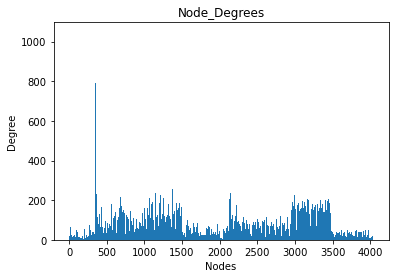

{1: 176468, 2: 2716134, 3: 3981852, 4: 5861560, 5: 2565170, 6: 677214, 7: 315464, 8: 15620}


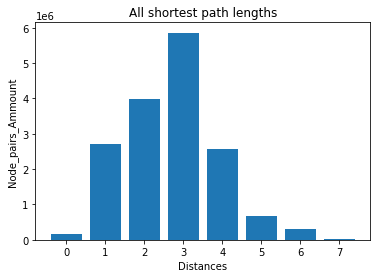

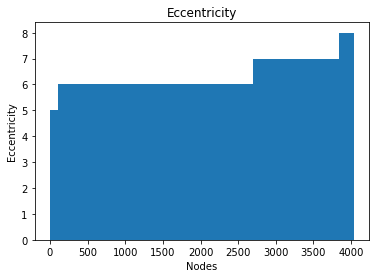

{4: 1, 5: 112, 6: 2579, 7: 1150, 8: 197}
Radius
4
-----
Diameter
8
-----


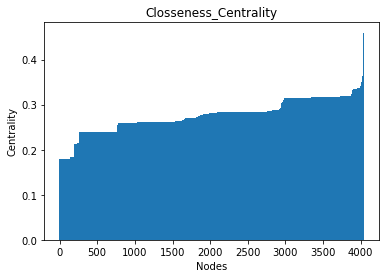

{692: 0.1782545358230698, 801: 0.1782545358230698, 699: 0.17826240508564364, 744: 0.17826240508564364, 749: 0.17826240508564364, 750: 0.17826240508564364, 775: 0.17826240508564364, 841: 0.17826240508564364, 743: 0.17827027504304446, 785: 0.17827027504304446, 854: 0.17827027504304446, 717: 0.17827814569536424, 757: 0.17827814569536424, 788: 0.17827814569536424, 790: 0.17827814569536424, 852: 0.17827814569536424, 855: 0.17827814569536424, 704: 0.17828601704269503, 802: 0.17828601704269503, 832: 0.17828601704269503, 851: 0.17828601704269503, 691: 0.17829388908512894, 721: 0.17829388908512894, 700: 0.17830176182275798, 791: 0.17830176182275798, 796: 0.17830176182275798, 846: 0.17830176182275798, 689: 0.17830963525567428, 702: 0.17830963525567428, 725: 0.17830963525567428, 733: 0.17830963525567428, 740: 0.17830963525567428, 767: 0.17830963525567428, 690: 0.17831750938396998, 710: 0.17831750938396998, 746: 0.17831750938396998, 761: 0.17831750938396998, 786: 0.17831750938396998, 808: 0.178317

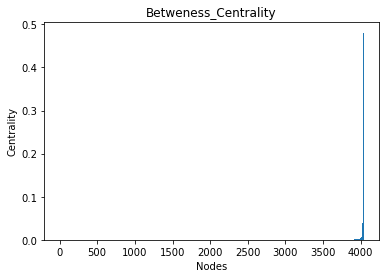

{11: 0.0, 12: 0.0, 15: 0.0, 18: 0.0, 32: 0.0, 33: 0.0, 35: 0.0, 37: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 46: 0.0, 47: 0.0, 52: 0.0, 63: 0.0, 70: 0.0, 71: 0.0, 74: 0.0, 76: 0.0, 78: 0.0, 86: 0.0, 90: 0.0, 102: 0.0, 110: 0.0, 112: 0.0, 114: 0.0, 131: 0.0, 135: 0.0, 138: 0.0, 145: 0.0, 153: 0.0, 154: 0.0, 160: 0.0, 183: 0.0, 191: 0.0, 195: 0.0, 201: 0.0, 205: 0.0, 207: 0.0, 209: 0.0, 210: 0.0, 215: 0.0, 216: 0.0, 218: 0.0, 220: 0.0, 228: 0.0, 233: 0.0, 234: 0.0, 241: 0.0, 244: 0.0, 255: 0.0, 256: 0.0, 262: 0.0, 264: 0.0, 267: 0.0, 273: 0.0, 279: 0.0, 282: 0.0, 286: 0.0, 287: 0.0, 292: 0.0, 293: 0.0, 305: 0.0, 306: 0.0, 309: 0.0, 316: 0.0, 321: 0.0, 327: 0.0, 328: 0.0, 335: 0.0, 336: 0.0, 2814: 0.0, 2838: 0.0, 2885: 0.0, 3003: 0.0, 899: 0.0, 910: 0.0, 911: 0.0, 918: 0.0, 945: 0.0, 1016: 0.0, 1027: 0.0, 1034: 0.0, 1046: 0.0, 1065: 0.0, 1071: 0.0, 1096: 0.0, 1119: 0.0, 1145: 0.0, 1176: 0.0, 1206: 0.0, 1208: 0.0, 1224: 0.0, 1233: 0.0, 1252: 0.0, 1253: 0.0, 1262: 0.0, 1270: 0.0, 1276: 0.0, 1326: 0.

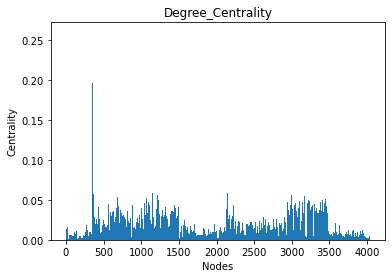

---------/n
[(0, '0.00'), (1, '0.00'), (2, '0.00'), (3, '0.00'), (4, '0.00'), (5, '0.00'), (6, '0.00'), (7, '0.00'), (8, '0.00'), (9, '0.00'), (10, '0.00'), (11, '0.00'), (12, '0.00'), (13, '0.00'), (14, '0.00'), (15, '0.00'), (16, '0.00'), (17, '0.00'), (18, '0.00'), (19, '0.00'), (20, '0.00'), (21, '0.00'), (22, '0.00'), (23, '0.00'), (24, '0.00'), (25, '0.00'), (26, '0.00'), (27, '0.00'), (28, '0.00'), (29, '0.00'), (30, '0.00'), (31, '0.00'), (32, '0.00'), (33, '0.00'), (34, '0.00'), (35, '0.00'), (36, '0.00'), (37, '0.00'), (38, '0.00'), (39, '0.00'), (40, '0.00'), (41, '0.00'), (42, '0.00'), (43, '0.00'), (44, '0.00'), (45, '0.00'), (46, '0.00'), (47, '0.00'), (48, '0.00'), (49, '0.00'), (50, '0.00'), (51, '0.00'), (52, '0.00'), (53, '0.00'), (54, '0.00'), (55, '0.00'), (56, '0.00'), (57, '0.00'), (58, '0.00'), (59, '0.00'), (60, '0.00'), (61, '0.00'), (62, '0.00'), (63, '0.00'), (64, '0.00'), (65, '0.00'), (66, '0.00'), (67, '0.00'), (68, '0.00'), (69, '0.00'), (70, '0.00'), (71

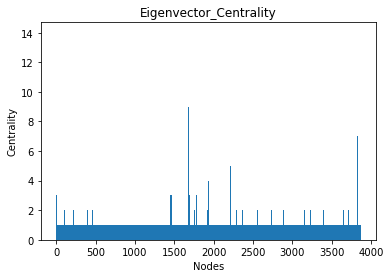

---------/n


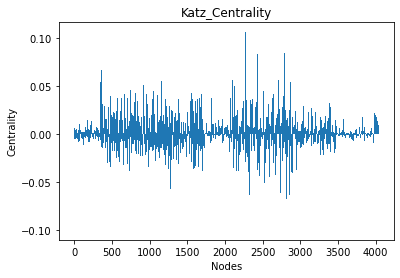

{0.043520260145873964: 1, 0.0031995995669909447: 1, -0.0028855128057170554: 1, -0.005344275261859998: 1, 0.0062688629249296164: 1, 0.00277982545172822: 1, 0.002209060896454994: 1, 0.016807836659263296: 1, 0.0025995472447471737: 2, -0.0028601801367238457: 1, 0.0003347774897982327: 1, 0.0010384155805736605: 1, 0.0010384155805736618: 1, 0.00011158283539783364: 1, -0.004486269471884586: 1, 0.0010384155805736595: 1, 0.004925452013845604: 1, -0.002754036670775433: 1, 0.0010384155805736614: 1, 0.0024984414120465983: 1, -0.00414189570261996: 1, -0.010047687246938: 1, 0.010357708138386348: 1, 0.007207057311490343: 1, -0.004131233216885039: 1, 0.0031453124207485045: 1, -0.0042391049502746815: 1, 0.004129671484939111: 1, -0.003648407963674085: 1, 0.005180271989200293: 1, 0.003481497342236539: 1, 0.007130940438079162: 1, 0.0008903291109370585: 1, 0.00115379508952629: 1, 0.012568235769145154: 1, 0.0022142693272049524: 1, -0.0026224306363891265: 1, 0.0010384155805736597: 1, 0.006584847231728077: 1, 

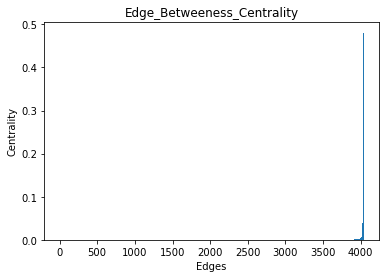

{11: 0.0, 12: 0.0, 15: 0.0, 18: 0.0, 32: 0.0, 33: 0.0, 35: 0.0, 37: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 46: 0.0, 47: 0.0, 52: 0.0, 63: 0.0, 70: 0.0, 71: 0.0, 74: 0.0, 76: 0.0, 78: 0.0, 86: 0.0, 90: 0.0, 102: 0.0, 110: 0.0, 112: 0.0, 114: 0.0, 131: 0.0, 135: 0.0, 138: 0.0, 145: 0.0, 153: 0.0, 154: 0.0, 160: 0.0, 183: 0.0, 191: 0.0, 195: 0.0, 201: 0.0, 205: 0.0, 207: 0.0, 209: 0.0, 210: 0.0, 215: 0.0, 216: 0.0, 218: 0.0, 220: 0.0, 228: 0.0, 233: 0.0, 234: 0.0, 241: 0.0, 244: 0.0, 255: 0.0, 256: 0.0, 262: 0.0, 264: 0.0, 267: 0.0, 273: 0.0, 279: 0.0, 282: 0.0, 286: 0.0, 287: 0.0, 292: 0.0, 293: 0.0, 305: 0.0, 306: 0.0, 309: 0.0, 316: 0.0, 321: 0.0, 327: 0.0, 328: 0.0, 335: 0.0, 336: 0.0, 2814: 0.0, 2838: 0.0, 2885: 0.0, 3003: 0.0, 899: 0.0, 910: 0.0, 911: 0.0, 918: 0.0, 945: 0.0, 1016: 0.0, 1027: 0.0, 1034: 0.0, 1046: 0.0, 1065: 0.0, 1071: 0.0, 1096: 0.0, 1119: 0.0, 1145: 0.0, 1176: 0.0, 1206: 0.0, 1208: 0.0, 1224: 0.0, 1233: 0.0, 1252: 0.0, 1253: 0.0, 1262: 0.0, 1270: 0.0, 1276: 0.0, 1326: 0.

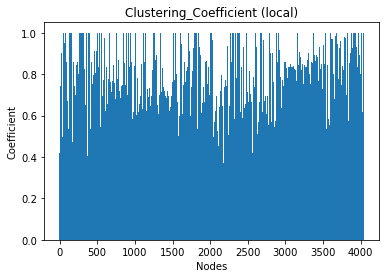

[(11, 0), (12, 0), (15, 0), (18, 0), (37, 0), (43, 0), (74, 0), (114, 0), (209, 0), (210, 0), (215, 0), (287, 0), (292, 0), (335, 0), (911, 0), (918, 0), (1096, 0), (1119, 0), (1145, 0), (1206, 0), (1386, 0), (1466, 0), (1560, 0), (1581, 0), (1834, 0), (358, 0), (447, 0), (550, 0), (585, 0), (602, 0), (607, 0), (608, 0), (613, 0), (624, 0), (638, 0), (668, 0), (674, 0), (692, 0), (801, 0), (860, 0), (875, 0), (883, 0), (891, 0), (892, 0), (2842, 0), (3031, 0), (3071, 0), (3183, 0), (3230, 0), (2079, 0), (2195, 0), (2269, 0), (2457, 0), (2470, 0), (2569, 0), (2596, 0), (3451, 0), (3453, 0), (3570, 0), (3650, 0), (3709, 0), (3729, 0), (3748, 0), (3798, 0), (3820, 0), (3853, 0), (3856, 0), (3935, 0), (3974, 0), (3984, 0), (4008, 0), (4010, 0), (4015, 0), (4022, 0), (4024, 0), (4035, 0), (3437, 0.032230414314509376), (0, 0.04196165314587463), (1684, 0.044774546986936364), (107, 0.049038479165520905), (3980, 0.0853302162478083), (1912, 0.10548597326400477), (686, 0.11562826313957536), (1505

0.010819963503439287
-----
Average_Clustering
0.6055467186200876
-----


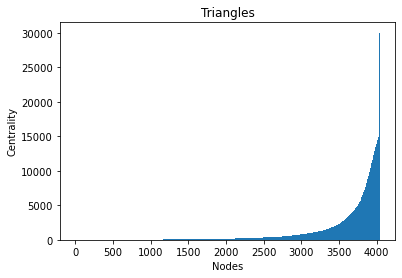

{11: 0, 12: 0, 15: 0, 18: 0, 37: 0, 43: 0, 74: 0, 114: 0, 209: 0, 210: 0, 215: 0, 287: 0, 292: 0, 335: 0, 911: 0, 918: 0, 1096: 0, 1119: 0, 1145: 0, 1206: 0, 1386: 0, 1466: 0, 1560: 0, 1581: 0, 1834: 0, 358: 0, 447: 0, 550: 0, 585: 0, 602: 0, 607: 0, 608: 0, 613: 0, 624: 0, 638: 0, 668: 0, 674: 0, 692: 0, 801: 0, 860: 0, 875: 0, 883: 0, 891: 0, 892: 0, 2842: 0, 3031: 0, 3071: 0, 3183: 0, 3230: 0, 2079: 0, 2195: 0, 2269: 0, 2457: 0, 2470: 0, 2569: 0, 2596: 0, 3451: 0, 3453: 0, 3570: 0, 3650: 0, 3709: 0, 3729: 0, 3748: 0, 3798: 0, 3820: 0, 3853: 0, 3856: 0, 3935: 0, 3974: 0, 3984: 0, 4008: 0, 4010: 0, 4015: 0, 4022: 0, 4024: 0, 4035: 0, 33: 1, 35: 1, 42: 1, 47: 1, 52: 1, 70: 1, 90: 1, 138: 1, 145: 1, 153: 1, 154: 1, 160: 1, 183: 1, 205: 1, 216: 1, 233: 1, 234: 1, 241: 1, 244: 1, 255: 1, 256: 1, 267: 1, 279: 1, 282: 1, 286: 1, 305: 1, 316: 1, 2814: 1, 1065: 1, 1176: 1, 1224: 1, 1233: 1, 1262: 1, 1270: 1, 1276: 1, 1326: 1, 1394: 1, 1395: 1, 1430: 1, 1558: 1, 1690: 1, 1755: 1, 1854: 1, 2704

In [6]:
metrics_calculation(G,"G")

--------------------
Graph V

Number of vertexes
4039
-----
Number of Edges
88374
-----


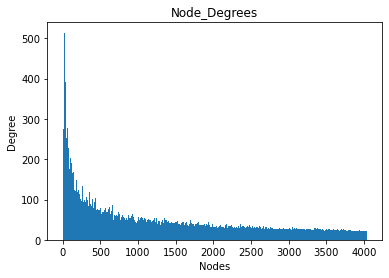

{1: 176748, 2: 7570832, 3: 8561900, 4: 2}


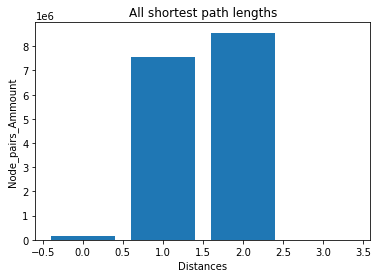

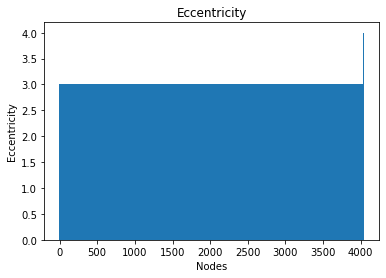

{3: 4037, 4: 2}
Radius
3
-----
Diameter
4
-----


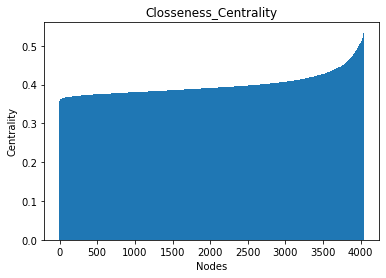

{3742: 0.35674529552080575, 3959: 0.35886953430501245, 4028: 0.359444543350543, 3724: 0.36008560727661854, 4013: 0.3606001071619932, 3246: 0.36079342387419583, 3863: 0.3610837878923366, 3846: 0.3611160794133429, 3955: 0.36137461965276535, 3209: 0.36143931256713213, 3538: 0.3615363953800698, 3930: 0.3616335303600215, 3177: 0.36166592028660993, 3766: 0.3618279569892473, 4030: 0.3618279569892473, 3813: 0.36192524872277493, 3279: 0.36228243315987796, 3396: 0.3624450228884301, 4037: 0.36273805246137264, 3985: 0.3627706405534094, 3757: 0.3629336688836958, 3255: 0.3630641970868549, 3845: 0.3630641970868549, 4038: 0.36345634563456347, 3167: 0.36352178610010805, 3914: 0.3635872501350621, 3516: 0.36361999099504727, 3455: 0.3638493422238241, 3884: 0.3638493422238241, 3843: 0.363882130305488, 3965: 0.363882130305488, 4024: 0.36394772420009014, 3779: 0.363980530016225, 3814: 0.363980530016225, 3197: 0.3640133417470477, 3429: 0.3640133417470477, 3384: 0.3640789829591561, 3767: 0.36411181244364293, 2

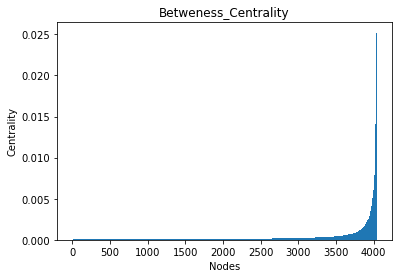

{3344: 3.0268655260337942e-05, 3467: 3.26532623514089e-05, 2745: 3.3919127559396414e-05, 2269: 3.4354585393445615e-05, 3871: 3.5789591778795955e-05, 3751: 3.5826532296817076e-05, 3108: 3.652287023725375e-05, 3957: 3.669349465071976e-05, 3902: 3.7121422109456444e-05, 3769: 3.717284919647743e-05, 3519: 3.753446890156116e-05, 3229: 3.761114175280771e-05, 3280: 3.7670228326342056e-05, 3892: 3.767749595451927e-05, 3983: 3.770983639303125e-05, 3310: 3.799819181184316e-05, 3870: 3.811704792577012e-05, 3228: 3.812772292557702e-05, 3380: 3.82158997116454e-05, 3961: 3.8482642374815506e-05, 3602: 3.889420900068226e-05, 3441: 3.8979257192447834e-05, 3476: 3.907260924545964e-05, 3037: 3.9172030157398575e-05, 1653: 3.919349498001823e-05, 3855: 3.945288417305483e-05, 2831: 3.9492514785678956e-05, 3891: 3.96944828988569e-05, 3843: 3.9775132174630817e-05, 3433: 3.9824343977380464e-05, 4002: 3.9903550480631124e-05, 3544: 3.990469368956223e-05, 3796: 3.9946689715966984e-05, 3111: 4.00638899614481e-05, 34

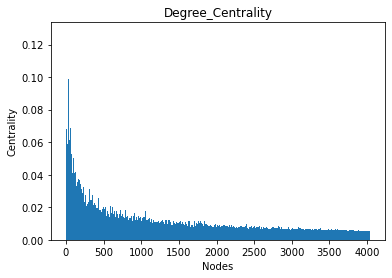

---------/n
[(0, '0.14'), (1, '0.05'), (2, '0.06'), (3, '0.03'), (4, '0.07'), (5, '0.06'), (6, '0.07'), (7, '0.07'), (8, '0.05'), (9, '0.07'), (10, '0.06'), (11, '0.04'), (12, '0.03'), (13, '0.04'), (14, '0.06'), (15, '0.06'), (16, '0.01'), (17, '0.06'), (18, '0.05'), (19, '0.07'), (20, '0.07'), (21, '0.05'), (22, '0.06'), (23, '0.11'), (24, '0.13'), (25, '0.11'), (26, '0.13'), (27, '0.13'), (28, '0.11'), (29, '0.11'), (30, '0.10'), (31, '0.10'), (32, '0.11'), (33, '0.08'), (34, '0.09'), (35, '0.10'), (36, '0.10'), (37, '0.11'), (38, '0.06'), (39, '0.08'), (40, '0.08'), (41, '0.09'), (42, '0.08'), (43, '0.08'), (44, '0.08'), (45, '0.07'), (46, '0.06'), (47, '0.07'), (48, '0.06'), (49, '0.07'), (50, '0.06'), (51, '0.06'), (52, '0.06'), (53, '0.06'), (54, '0.07'), (55, '0.07'), (56, '0.06'), (57, '0.05'), (58, '0.07'), (59, '0.06'), (60, '0.06'), (61, '0.06'), (62, '0.07'), (63, '0.06'), (64, '0.05'), (65, '0.06'), (66, '0.05'), (67, '0.06'), (68, '0.05'), (69, '0.05'), (70, '0.06'), (71

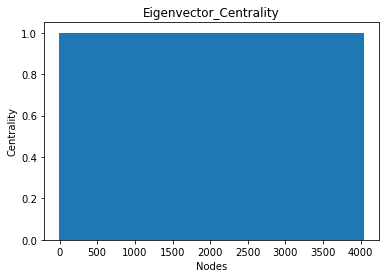

---------/n


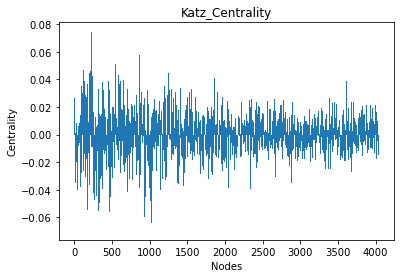

{0.008644866157329779: 1, 0.00678734971081066: 1, 0.013333966382431702: 1, 0.026438010152318264: 1, 0.0014860816096248066: 1, 0.0006543886411173186: 1, 0.0024371163509414187: 1, -0.03463337384631238: 1, 0.013413920930801125: 1, 0.013786462580689662: 1, -0.0006451359681325789: 1, -0.025746568285397915: 1, 0.004430949471751225: 1, 0.025401166781603663: 1, -0.007641285855202741: 1, 0.0013756354583971363: 1, -0.035042581403459006: 1, -0.0037641853615985425: 1, -0.005660126987850074: 1, -0.0041124439453513765: 1, 0.005128533224653149: 1, 0.023491106648250198: 1, 0.00017493196217737488: 1, 0.003768489078122418: 1, 0.007504778881002081: 1, -0.0037406042045466203: 1, -0.00886437645809623: 1, -0.0016594018601898246: 1, 0.008181731907228734: 1, -0.020141449874413478: 1, 0.00019586845259855355: 1, -0.005802210830182135: 1, -0.00528822863881884: 1, -0.0035486780628599494: 1, 0.002698872938851823: 1, -0.012914689698700868: 1, 0.011190652708684518: 1, -0.004308647530100434: 1, 0.01618116765641473: 1

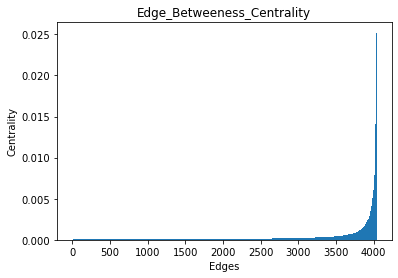

{3344: 3.0268655260337942e-05, 3467: 3.26532623514089e-05, 2745: 3.3919127559396414e-05, 2269: 3.4354585393445615e-05, 3871: 3.5789591778795955e-05, 3751: 3.5826532296817076e-05, 3108: 3.652287023725375e-05, 3957: 3.669349465071976e-05, 3902: 3.7121422109456444e-05, 3769: 3.717284919647743e-05, 3519: 3.753446890156116e-05, 3229: 3.761114175280771e-05, 3280: 3.7670228326342056e-05, 3892: 3.767749595451927e-05, 3983: 3.770983639303125e-05, 3310: 3.799819181184316e-05, 3870: 3.811704792577012e-05, 3228: 3.812772292557702e-05, 3380: 3.82158997116454e-05, 3961: 3.8482642374815506e-05, 3602: 3.889420900068226e-05, 3441: 3.8979257192447834e-05, 3476: 3.907260924545964e-05, 3037: 3.9172030157398575e-05, 1653: 3.919349498001823e-05, 3855: 3.945288417305483e-05, 2831: 3.9492514785678956e-05, 3891: 3.96944828988569e-05, 3843: 3.9775132174630817e-05, 3433: 3.9824343977380464e-05, 4002: 3.9903550480631124e-05, 3544: 3.990469368956223e-05, 3796: 3.9946689715966984e-05, 3111: 4.00638899614481e-05, 34

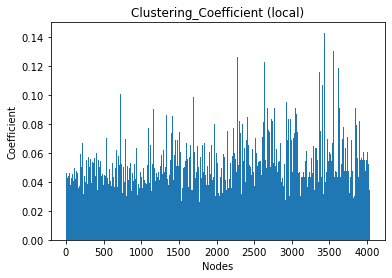

[(3713, 0), (3834, 0), (2285, 0.002150537634408602), (2476, 0.0024630541871921183), (3423, 0.003076923076923077), (3250, 0.0036231884057971015), (3279, 0.0036231884057971015), (3411, 0.0036231884057971015), (3429, 0.0036231884057971015), (3742, 0.0036231884057971015), (3776, 0.003952569169960474), (3930, 0.003952569169960474), (3824, 0.004329004329004329), (3843, 0.004329004329004329), (3878, 0.004329004329004329), (3959, 0.004329004329004329), (3994, 0.004329004329004329), (4013, 0.004329004329004329), (4019, 0.004329004329004329), (4028, 0.004329004329004329), (3069, 0.005291005291005291), (2571, 0.005698005698005698), (2950, 0.006153846153846154), (2071, 0.0064516129032258064), (2688, 0.006666666666666667), (2934, 0.006666666666666667), (3145, 0.006666666666666667), (3167, 0.006666666666666667), (2651, 0.006896551724137931), (3387, 0.007905138339920948), (3749, 0.007905138339920948), (3813, 0.007905138339920948), (3311, 0.007936507936507936), (2086, 0.008064516129032258), (2119, 0.0

0.01083713143066101
-----
Average_Clustering
0.037131013681902955
-----


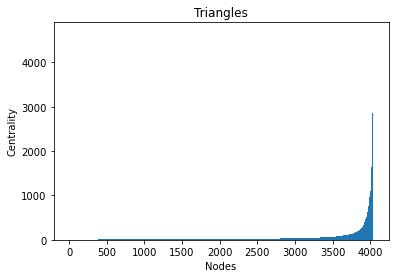

{3713: 0, 3834: 0, 2285: 1, 2476: 1, 3250: 1, 3279: 1, 3411: 1, 3423: 1, 3429: 1, 3742: 1, 3776: 1, 3824: 1, 3843: 1, 3878: 1, 3930: 1, 3959: 1, 3994: 1, 4013: 1, 4019: 1, 4028: 1, 2571: 2, 2688: 2, 2934: 2, 2950: 2, 3069: 2, 3145: 2, 3167: 2, 3387: 2, 3608: 2, 3701: 2, 3749: 2, 3813: 2, 3829: 2, 3854: 2, 3914: 2, 3945: 2, 3963: 2, 3969: 2, 3976: 2, 4014: 2, 4020: 2, 2071: 3, 2119: 3, 2651: 3, 2828: 3, 2916: 3, 2938: 3, 3013: 3, 3017: 3, 3173: 3, 3236: 3, 3239: 3, 3246: 3, 3254: 3, 3259: 3, 3285: 3, 3298: 3, 3299: 3, 3303: 3, 3311: 3, 3396: 3, 3424: 3, 3426: 3, 3432: 3, 3448: 3, 3466: 3, 3509: 3, 3516: 3, 3523: 3, 3544: 3, 3575: 3, 3637: 3, 3665: 3, 3697: 3, 3705: 3, 3716: 3, 3724: 3, 3756: 3, 3757: 3, 3779: 3, 3839: 3, 3846: 3, 3884: 3, 3926: 3, 3960: 3, 3964: 3, 4007: 3, 4037: 3, 2032: 4, 2086: 4, 2166: 4, 2288: 4, 2299: 4, 2328: 4, 2359: 4, 2368: 4, 2591: 4, 2691: 4, 2716: 4, 2755: 4, 2830: 4, 2850: 4, 2851: 4, 2877: 4, 2887: 4, 2894: 4, 3000: 4, 3064: 4, 3102: 4, 3144: 4, 3197: 4, 

In [7]:
metrics_calculation(V,"V")